Cristian Villazhannay  
ME 470  
May 21, 2023  

Implement a Backward Euler scheme to integrate in time, up to a final time of t = 0.5 for the 3D Heat Equation, using a Krylov Solver in PETSc to handle the parallel matrix solution.

$$
\frac{T^{n+1} - T^{n}}{\Delta t} = D\nabla^{2}T^{n+1}
$$

Please note that the linear matrix equation at every time step takes the form: 

$$
J(T^{n+1, k}) \delta T^{k} = -F(T^{n+1,k})
$$

### Part A 
For a given node, the discretized equation is: 
$$
\left(
1 + 2 \frac{D \Delta t}{\Delta x^2} + 2 \frac{D \Delta t}{\Delta y^2} + 2 \frac{D \Delta t}{\Delta z^2}
\right)
\delta^{k}_{i, j, k}

- \frac{D \Delta t}{\Delta x^2} \left( \delta^{k}_{i + 1,j    ,k    } + \delta^{k}_{i - 1,j    ,k    } \right)
- \frac{D \Delta t}{\Delta y^2} \left( \delta^{k}_{i    ,j + 1,k    } + \delta^{k}_{i    ,j - 1,k    } \right)
- \frac{D \Delta t}{\Delta z^2} \left( \delta^{k}_{i    ,j    ,k + 1} + \delta^{k}_{i    ,j    ,k - 1} \right)
= -F(u^{n+1}_{i, j, k})
$$

$$
\text{where }
$$

$$
-F(u^{n+1}_{i, j, k}) =
-u^{n+1,k}_{i,j,k} + u^{n,k}_{i,j,k}
+ \frac{D \Delta t}{\Delta x^2} \left( u_{i + 1, j    , k    }^{n+1} - 2 u_{i  , j  , k  }^{n+1} + u_{i - 1, j    , k    }^{n+1} \right) 
+ \frac{D \Delta t}{\Delta y^2} \left( u_{i    , j + 1, k    }^{n+1} - 2 u_{i  , j  , k  }^{n+1} + u_{i    , j - 1, k    }^{n+1} \right)
+ \frac{D \Delta t}{\Delta z^2} \left( u_{i    , j    , k + 1}^{n+1} - 2 u_{i  , j  , k  }^{n+1} + u_{i    , j    , k - 1}^{n+1} \right)
$$



### Part B 
The modified version of this equation so that the RHS resembles $J \cdot T^{n+1, k}$ and other terms is: 

$$
\left(
1 + 2 \frac{D \Delta t}{\Delta x^2} + 2 \frac{D \Delta t}{\Delta y^2} + 2 \frac{D \Delta t}{\Delta z^2}
\right)
\delta^{k}_{i, j, k}

- 2 \frac{D \Delta t}{\Delta x^2} \left( \delta^{k}_{i + 1,j    ,k    } + \delta^{k}_{i - 1,j    ,k    } \right)
- 2 \frac{D \Delta t}{\Delta y^2} \left( \delta^{k}_{i    ,j + 1,k    } + \delta^{k}_{i    ,j - 1,k    } \right)
- 2 \frac{D \Delta t}{\Delta z^2} \left( \delta^{k}_{i    ,j    ,k + 1} + \delta^{k}_{i    ,j    ,k - 1} \right)
= -F(u^{n+1}_{i, j, k})
$$

$$
\text{where }
$$

$$
-F(u^{n+1}_{i, j, k}) =
u^{n,k}_{i,j,k} 
+ u^{n+1,k}_{i,j,k} \left(-1 - 2\frac{D \Delta t}{\Delta x^2} - 2\frac{D \Delta t}{\Delta y^2} - 2 \frac{D \Delta t}{\Delta z^2} \right)
+ \frac{D \Delta t}{\Delta x^2} \left( u_{i + 1, j    , k    }^{n+1} + u_{i - 1, j    , k    }^{n+1} \right) 
+ \frac{D \Delta t}{\Delta y^2} \left( u_{i    , j + 1, k    }^{n+1} + u_{i    , j - 1, k    }^{n+1} \right)
+ \frac{D \Delta t}{\Delta z^2} \left( u_{i    , j    , k + 1}^{n+1} + u_{i    , j    , k - 1}^{n+1} \right)
$$


### Part C 
The final output of the case where $\Delta x=\Delta y =\Delta z = 0.01 \text{ and } \Delta t = 0.01$ is:  
 
```python
time =  0.5000, iters =   24, |du| =   5.0293
``` 

Note that this was run on 8 processers in parallel.

### Part D 
Using the same grid size and timestep sizes as Part C, the value of T(0.5,0.5,0.5) is plotted as a function of time.

The final value of x, y, z at (0.5, 0.5, 0.5) in serial is 0.532017


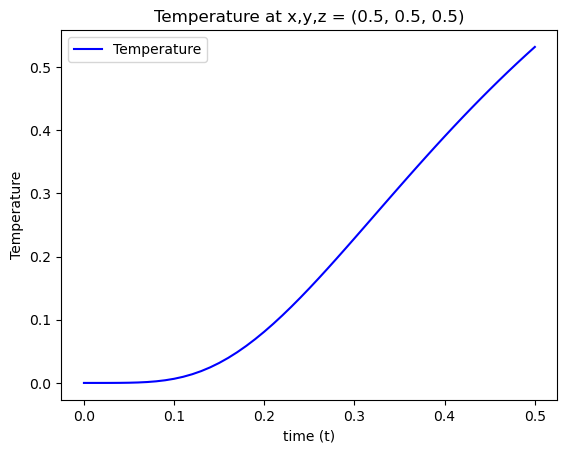

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#import our data 
middle = np.loadtxt('part_c.dat')

#Plot our data. 
fig, axs = plt.subplots()
axs.plot(middle[:,0],middle[:,1], label="Temperature", color="blue")
axs.set(xlabel='time (t)', ylabel='Temperature',
       title='Temperature at x,y,z = (0.5, 0.5, 0.5)')
axs.legend()

print("The final value of x, y, z at (0.5, 0.5, 0.5) in serial is {}".format(middle[-1][1]))



### Part E 
To verify that the code is converging as the grid is refined we are tabulating the value of T at point $x = 0.5 = 0.5 = 0.5$ 

| Grid Size | T(0.5, 0.5, 0.5) |
|:---------:|:----------------:|
|   0.005   |     0.531952     |
|    0.01   |     0.532017     |
|    0.02   |     0.532277     |

### Part F 
To verify that the code is converging as the timestep is refined, we are tabulating the value of T at point $x = 0.5 = 0.5 = 0.5$ 

| Timestep | T(0.5, 0.5, 0.5) |
|:--------:|:----------------:|
|   0.005  |     0.535655     |
|   0.01   |     0.532017     |
|   0.02   |     0.525115     |

### Part G 
A strong scaling study where $\Delta x=\Delta y =\Delta z = 0.01 \text{ and } \Delta t = 0.01$. The time being used is the total compute time that is measures the matrix/vector assembly and the time integration loop.

| Processors |   Time   |
|:----------:|:--------:|
|      1     | 40.5361 |
|      2     | 34.5100 |
|      4     | 17.9053 |
|      8     |  9.7693 |
|     16     |  8.5406 |

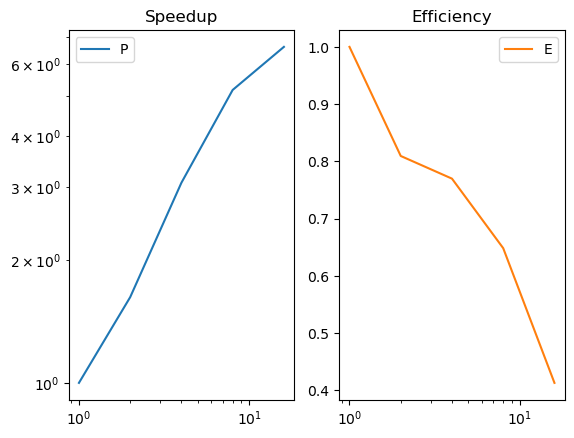

In [13]:
#Create our data to be plotted
proc = [1, 2, 4, 8, 16]
time = [286.4218, 176.9438, 93.0236, 55.2321, 43.3588]
data = []

E = time.copy() #Efficiency
buff = time.copy()

#Calculate our time and E (speedup)
for i in range(len(time)):
    time[i] = buff[0]/buff[i]
    E[i] = buff[0]/ (proc[i] * buff[i])

#Plot speedup
fig, axs = plt.subplots(1,2)
axs[0].loglog(proc,time, label="P")
axs[0].set_title("Speedup")
axs[0].legend()

#Plotting the efficiency
axs[1].semilogx(proc,E, "tab:orange", label="E")
axs[1].set_title("Efficiency")
axs[1].legend()

### Part H 
The three preconditioners that were chosen for this were `eisenstat`, `mg`, and `sor`.

The problem values that were used are $\Delta x=\Delta y =\Delta z = 0.01 \text{ and } \Delta t = 0.01$, with 8 processors running in parallel.

| Preconditioner | Total Run Time | Average Iterations |
|:--------------:|:--------------:|:------------------:|
|       sor      |     14.5723    |         25         |
|       mg       |     12.3021    |         14         |
|    eisenstat   |     15.6494    |         26         |
